In [20]:
import pandas as pd 
import os 
from sklearn.impute import KNNImputer
import numpy as np

In [10]:
cancer_name = "ACC"  # 癌症名称
indicator = 'miRNA' # 指标

In [24]:
path = os.path.join("..", "dataset", cancer_name, indicator)
df = pd.read_csv(path, sep="\t", index_col=0).T

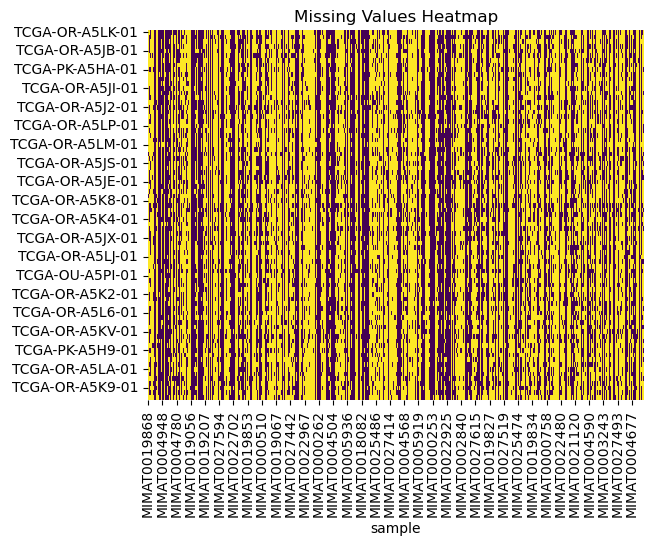

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# 查看缺失值
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [26]:
# 设置阈值，比如缺失超过 20% 的列就删掉
threshold = 0.2

# 每列缺失比例
missing_ratio = df.isna().mean()

# 保留缺失比例 <= 20% 的列
df_filtered = df.loc[:, missing_ratio <= threshold]

In [28]:
df_filtered

sample,MIMAT0019865,MIMAT0000765,MIMAT0000764,MIMAT0000761,MIMAT0000760,MIMAT0000763,MIMAT0000762,MIMAT0002891,MIMAT0002890,MIMAT0004761,...,MIMAT0004585,MIMAT0004584,MIMAT0004586,MIMAT0003298,MIMAT0003296,MIMAT0003297,MIMAT0023712,MIMAT0003293,MIMAT0001080,MIMAT0017950
TCGA-OR-A5LK-01,0.226000,2.896009,6.393873,4.568199,3.881188,8.004982,3.897705,0.226000,1.518702,9.378751,...,4.321347,4.588684,5.472820,1.236706,0.885876,0.593326,1.012557,1.236695,6.405437,1.601644
TCGA-OR-A5LD-01,1.006594,1.287892,5.319414,7.767207,5.130447,6.148356,5.481799,0.365511,6.446643,11.158981,...,5.244548,5.689544,5.266353,0.518532,0.518542,1.370725,0.194300,0.899223,6.990504,1.200108
TCGA-OR-A5JC-01,0.507072,4.051783,4.407216,5.335698,3.329986,7.808881,4.014701,0.507072,3.876667,10.406496,...,3.995785,4.157738,4.858491,1.307012,NaN,1.729739,0.275700,NaN,5.859810,1.306958
TCGA-OR-A5J5-01,0.973217,4.105337,6.234903,5.480885,3.343338,9.977356,4.329240,0.401724,6.575664,8.441104,...,4.221614,4.196595,4.657562,1.289626,0.715605,0.401724,1.381497,0.401724,6.225694,0.214800
TCGA-OR-A5JB-01,NaN,1.958687,5.989857,6.101852,4.647199,10.179843,4.339566,2.073094,0.972595,0.972609,...,6.186918,5.061680,7.014676,4.169988,1.548318,2.538972,2.073117,2.277759,7.922084,3.822923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-OR-A5JY-01,2.004009,5.069313,6.564120,6.268686,4.568071,9.706741,5.009313,1.544091,0.349100,11.484252,...,3.440266,3.160021,5.375535,1.673534,0.629969,1.401915,2.632558,0.864908,7.765050,2.352206
TCGA-OR-A5LN-01,0.708686,1.687130,5.421754,5.812127,5.031933,8.354721,4.506199,0.397400,4.837615,9.612515,...,4.312573,5.073241,3.670743,1.370625,1.279359,1.370577,1.077447,NaN,2.060580,1.614277
TCGA-OR-A5K9-01,1.102453,6.002155,4.466523,5.849783,4.649071,9.442855,4.539471,0.298000,6.052888,6.337039,...,6.072668,5.039614,4.924457,0.755621,NaN,1.102436,3.020211,0.755585,7.509817,1.248944
TCGA-OR-A5J7-01,1.092681,3.194562,5.071223,5.790944,5.963219,8.923416,4.463774,1.092681,6.643736,10.270418,...,6.481336,6.019696,5.588477,1.370557,0.539124,1.894640,NaN,0.930666,8.391465,0.930684


In [ ]:
df_numeric = df_filtered.select_dtypes(include=[np.number])

# 创建插补器对象
imputer = KNNImputer(n_neighbors=5)  # 5个最近邻

# 拟合并转换
arr_filled = imputer.fit_transform(df_numeric)

df_filled = pd.DataFrame(arr_filled, index=df_numeric.index, columns=df_numeric.columns)

import os

path = os.path.join("..", "dataset", "ACC", "miRNA_filled")
df_filled.to_csv(path)

sample,MIMAT0019865,MIMAT0000765,MIMAT0000764,MIMAT0000761,MIMAT0000760,MIMAT0000763,MIMAT0000762,MIMAT0002891,MIMAT0002890,MIMAT0004761,...,MIMAT0004585,MIMAT0004584,MIMAT0004586,MIMAT0003298,MIMAT0003296,MIMAT0003297,MIMAT0023712,MIMAT0003293,MIMAT0001080,MIMAT0017950
TCGA-OR-A5LK-01,0.226000,2.896009,6.393873,4.568199,3.881188,8.004982,3.897705,0.226000,1.518702,9.378751,...,4.321347,4.588684,5.472820,1.236706,0.885876,0.593326,1.012557,1.236695,6.405437,1.601644
TCGA-OR-A5LD-01,1.006594,1.287892,5.319414,7.767207,5.130447,6.148356,5.481799,0.365511,6.446643,11.158981,...,5.244548,5.689544,5.266353,0.518532,0.518542,1.370725,0.194300,0.899223,6.990504,1.200108
TCGA-OR-A5JC-01,0.507072,4.051783,4.407216,5.335698,3.329986,7.808881,4.014701,0.507072,3.876667,10.406496,...,3.995785,4.157738,4.858491,1.307012,0.816823,1.729739,0.275700,0.694930,5.859810,1.306958
TCGA-OR-A5J5-01,0.973217,4.105337,6.234903,5.480885,3.343338,9.977356,4.329240,0.401724,6.575664,8.441104,...,4.221614,4.196595,4.657562,1.289626,0.715605,0.401724,1.381497,0.401724,6.225694,0.214800
TCGA-OR-A5JB-01,0.813398,1.958687,5.989857,6.101852,4.647199,10.179843,4.339566,2.073094,0.972595,0.972609,...,6.186918,5.061680,7.014676,4.169988,1.548318,2.538972,2.073117,2.277759,7.922084,3.822923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-OR-A5JY-01,2.004009,5.069313,6.564120,6.268686,4.568071,9.706741,5.009313,1.544091,0.349100,11.484252,...,3.440266,3.160021,5.375535,1.673534,0.629969,1.401915,2.632558,0.864908,7.765050,2.352206
TCGA-OR-A5LN-01,0.708686,1.687130,5.421754,5.812127,5.031933,8.354721,4.506199,0.397400,4.837615,9.612515,...,4.312573,5.073241,3.670743,1.370625,1.279359,1.370577,1.077447,0.634440,2.060580,1.614277
TCGA-OR-A5K9-01,1.102453,6.002155,4.466523,5.849783,4.649071,9.442855,4.539471,0.298000,6.052888,6.337039,...,6.072668,5.039614,4.924457,0.755621,0.585246,1.102436,3.020211,0.755585,7.509817,1.248944
TCGA-OR-A5J7-01,1.092681,3.194562,5.071223,5.790944,5.963219,8.923416,4.463774,1.092681,6.643736,10.270418,...,6.481336,6.019696,5.588477,1.370557,0.539124,1.894640,1.915148,0.930666,8.391465,0.930684


In [4]:
df.head() # 查看前五行

,0,1,2,3,4,5,6,7,8,9,...,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951
sample,MIMAT0019868,MIMAT0019869,MIMAT0019860,MIMAT0019861,MIMAT0019862,MIMAT0019863,MIMAT0019864,MIMAT0019865,MIMAT0019866,MIMAT0019867,...,MIMAT0003293,MIMAT0000228,MIMAT0020958,MIMAT0001080,MIMAT0027508,MIMAT0019688,MIMAT0027607,MIMAT0019791,MIMAT0018106,MIMAT0017950
TCGA-OR-A5LK-01,0.226,NaN,NaN,NaN,NaN,NaN,NaN,0.226,NaN,0.226,...,1.236695,NaN,NaN,6.405437,0.226,NaN,0.226,NaN,NaN,1.601644
TCGA-OR-A5LD-01,NaN,0.1943,NaN,NaN,NaN,NaN,0.518542,1.006594,NaN,0.1943,...,0.899223,NaN,NaN,6.990504,NaN,NaN,NaN,NaN,NaN,1.200108
TCGA-OR-A5JC-01,0.2757,0.2757,NaN,NaN,NaN,NaN,0.507072,0.507072,NaN,NaN,...,NaN,NaN,NaN,5.85981,NaN,0.2757,NaN,NaN,NaN,1.306958
TCGA-OR-A5J5-01,0.4017,0.2148,NaN,NaN,NaN,NaN,0.401724,0.973217,NaN,NaN,...,0.401724,0.2148,NaN,6.225694,NaN,NaN,0.401724,NaN,NaN,0.2148


In [5]:
df.tail() # 查看后五行

,0,1,2,3,4,5,6,7,8,9,...,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951
TCGA-OR-A5JY-01,0.3491,NaN,NaN,NaN,NaN,NaN,NaN,2.004009,NaN,NaN,...,0.864908,NaN,NaN,7.76505,NaN,NaN,0.3491,NaN,0.629969,2.352206
TCGA-OR-A5LN-01,NaN,NaN,NaN,NaN,0.2124,NaN,0.2124,0.708686,0.2124,0.2124,...,NaN,NaN,0.2124,2.06058,NaN,0.2124,0.2124,NaN,NaN,1.614277
TCGA-OR-A5K9-01,NaN,NaN,NaN,NaN,NaN,NaN,0.298,1.102453,0.544859,NaN,...,0.755585,NaN,NaN,7.509817,NaN,NaN,NaN,NaN,NaN,1.248944
TCGA-OR-A5J7-01,NaN,0.2946,NaN,NaN,NaN,NaN,0.2946,1.092681,NaN,0.2946,...,0.930666,NaN,NaN,8.391465,NaN,0.2946,0.7481,NaN,NaN,0.930684
TCGA-OR-A5JD-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.859605,NaN,NaN,2.2219,NaN,0.4929,0.4929,NaN,NaN,1.39456


In [6]:
df.sample(5) # 随机查看5行

,0,1,2,3,4,5,6,7,8,9,...,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951
TCGA-OR-A5LH-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.599719,NaN,NaN,...,1.614317,NaN,NaN,5.708217,NaN,NaN,NaN,NaN,NaN,2.121051
TCGA-OR-A5KO-01,0.2852,0.2852,NaN,NaN,NaN,NaN,NaN,0.523219,NaN,0.523219,...,1.208761,NaN,NaN,8.269136,NaN,NaN,NaN,NaN,NaN,2.237459
TCGA-OR-A5L5-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4126,NaN,NaN,...,0.9952,NaN,NaN,2.930247,NaN,0.7331,NaN,NaN,NaN,2.799079
TCGA-OR-A5K1-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.506561,NaN,NaN,...,0.506561,NaN,NaN,5.295966,NaN,NaN,NaN,NaN,NaN,1.177634
TCGA-OR-A5LM-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.551531,NaN,NaN,...,NaN,NaN,NaN,5.816771,NaN,NaN,NaN,NaN,NaN,0.717


In [7]:
df.shape # 查看表格行列数

(80, 1952)

In [8]:
df.columns # 查看列名

RangeIndex(start=0, stop=1952, step=1)

In [9]:
df.info() # 查看信息 缺失等

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, sample to TCGA-OR-A5JD-01
Columns: 1952 entries, 0 to 1951
dtypes: object(1952)
memory usage: 1.2+ MB


In [10]:
df.describe() # 列出列的统计信息

,0,1,2,3,4,5,6,7,8,9,...,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951
count,19,16,3,2,2,2,42,76.000000,9,31,...,75,5,10,80,14,26,41,2,17,80
unique,19,16,3,2,2,2,42,75.000000,9,31,...,75,5,10,80,14,26,41,2,17,80
top,MIMAT0019868,MIMAT0019869,MIMAT0019860,MIMAT0019861,MIMAT0019862,MIMAT0019863,MIMAT0019864,0.506561,MIMAT0019866,MIMAT0019867,...,MIMAT0003293,MIMAT0000228,MIMAT0020958,MIMAT0001080,MIMAT0027508,MIMAT0019688,MIMAT0027607,MIMAT0019791,MIMAT0018106,MIMAT0017950
freq,1,1,1,1,1,1,1,2.000000,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
# progCAE的样例数据
cancer_name = "data"  # 癌症名称
indicator = "example_miRNA.csv"  # 指标
path = os.path.join("..", "dataset", cancer_name, indicator)
df2 = pd.read_csv(path).T

In [4]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,601,602,603,604,605,606,607,608,609,610
Unnamed: 0,TCGA-E9-A228-01,TCGA-D8-A1J8-01,TCGA-AC-A3YI-01,TCGA-OL-A66J-01,TCGA-EW-A1IX-01,TCGA-B6-A1KF-01,TCGA-C8-A1HO-01,TCGA-BH-A1F5-01,TCGA-XX-A89A-01,TCGA-D8-A27K-01,...,TCGA-BH-A0BT-01,TCGA-EW-A1PE-01,TCGA-OL-A5RX-01,TCGA-E2-A1AZ-01,TCGA-AC-A8OR-01,TCGA-MS-A51U-01,TCGA-EW-A1IY-01,TCGA-BH-A1FN-01,TCGA-E2-A3DX-01,TCGA-E9-A1RF-01
483,0.2261,1.014887,0.732976,1.158233,0.905404,2.362362,0.985489,0.907562,0.803205,0.536084,...,1.280146,0.599,0.678837,1.468579,0.2439,1.152558,0.857743,1.181808,0.687156,1.075919
450,0.593599,1.43354,0.1794,1.875497,1.741662,1.80127,3.388535,2.023421,1.204106,0.536084,...,1.757442,1.837264,0.67894,0.958052,0.2439,1.883778,0.8578,1.29266,0.8178,1.685399
33,6.356281,6.24509,5.173147,8.15884,6.363603,6.949743,8.705477,6.497231,5.973683,6.518807,...,7.29199,6.117894,7.08662,5.946676,5.680202,7.155937,6.034969,6.611306,4.452889,7.020027
466,9.077764,8.305582,10.021334,10.955338,9.044992,8.401708,8.360238,8.550726,10.002916,9.324307,...,7.743713,8.936408,10.168445,10.032713,9.804115,10.284381,8.443872,7.82641,10.663039,8.414469


In [4]:
nan_columns = df.columns[df.isna().any()]
len(nan_columns)

1614